In [61]:
from pv_analyzer import pv_analyze
import numpy as np
import matplotlib.pyplot as plt
import os

In [62]:
%matplotlib widget

In [63]:
def emp_kep_v(v_rot, v_100):        
        r_au = 100.*np.power(v_100/v_rot, 2)
        return r_au

def emp_kep_r(r, r_b, v_100):
        v_r = v_100*(r/r_b)**(-0.5)
        return v_r

In [64]:
# define fix r points
# Get equidistance points

r_au_empkep_rs_fix_r = np.arange(start=42., step=42., stop=840.)
r_au_empkep_bs_fix_r = -r_au_empkep_rs_fix_r

v_100 = 2.842 #kmps # idpft-2.674 # JS- 3.2 # newft 2.842

v_rot_empkep_rs_fix_r =  emp_kep_r(r=r_au_empkep_rs_fix_r, r_b=100., v_100=v_100)
v_rot_empkep_bs_fix_r = - v_rot_empkep_rs_fix_r

plot_points = [r_au_empkep_rs_fix_r, v_rot_empkep_rs_fix_r, r_au_empkep_bs_fix_r, v_rot_empkep_bs_fix_r]

In [65]:
# Evaluate empirical keplerian curve function
r_rs_func = np.arange(start=1., step=0.5, stop=840.)   # Note that this is in AU
v_rs_func = emp_kep_r(r=r_rs_func, r_b=100., v_100=v_100)

r_bs_func = -r_rs_func
v_bs_func = -v_rs_func

In [67]:
pv_without_beam_fname = "L1489irs_model_i_73.0without_beam_conv_pv.fits"

pv_with_beam_fname = "L1489irs_model_i_73.0with_beam_conv_pv.fits"

pv_with_beam = pv_analyze(pv_path=pv_with_beam_fname,
                    is_Tb=False, v_sys=7.22) # V_sys - 7.22, 7.27 7.33
pv_with_beam.read_pv(print_details = True)          
Tb_pv_with_beam = pv_with_beam.get_tb_on_curve(curve_function = None, 
                            get_surrounding_pix = False, mode='func',
                            num_pix = 3, return_coords=True)


pv_without_beam = pv_analyze(pv_path=pv_without_beam_fname,
                    is_Tb=False, v_sys=7.22) # V_sys - 7.22, 7.27 7.33
pv_without_beam.read_pv(print_details = True)


Tb_pv_without_beam = pv_without_beam.get_tb_on_curve(curve_function = None, 
                            get_surrounding_pix = False, mode='func',
                            num_pix = 3, return_coords=True)

Convert frequency to velocity
 rms = 4.81e-12 Jy beam$^-1$
Convert frequency to velocity
 rms = 3.48e-14 Jy beam$^-1$


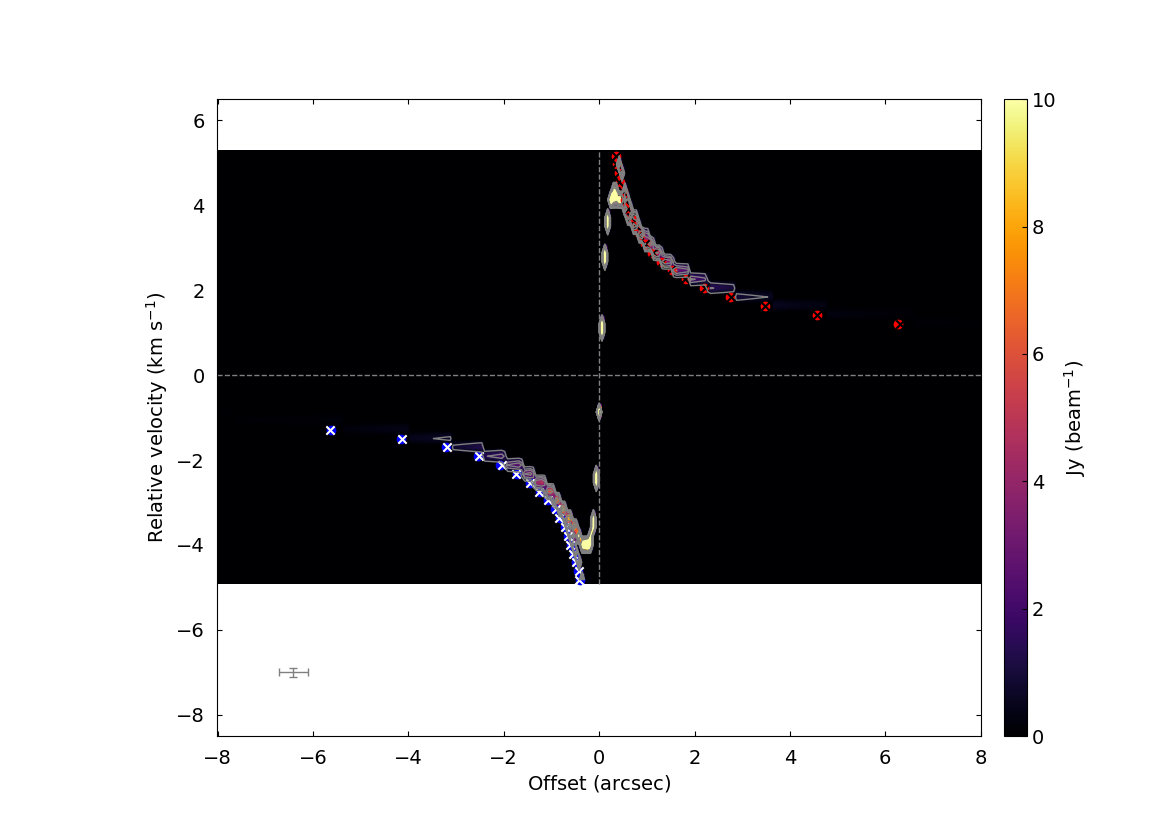

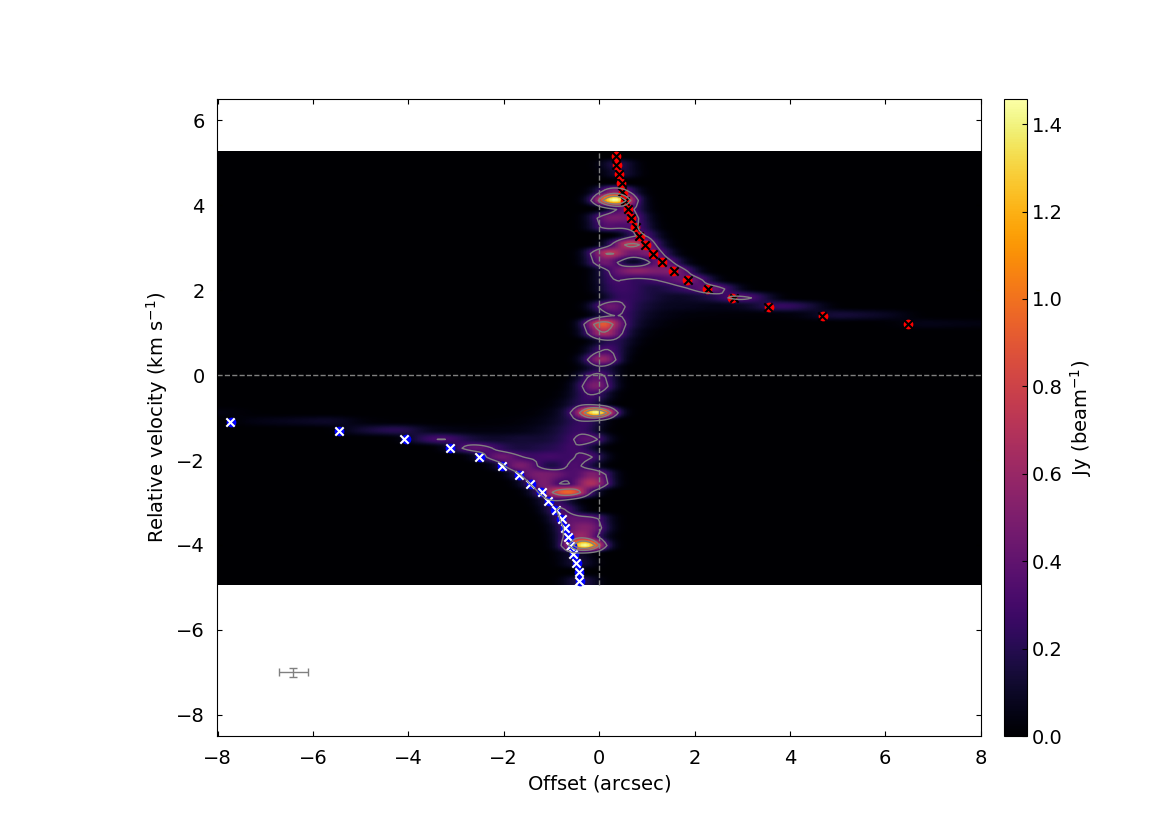

In [36]:
pv_without_beam_fig = pv_without_beam.plot_pv(plot_curve=True, base_ctr_lvl= 0.2,
                                              cbarlim=[0.,10])
pv_with_beam_fig = pv_with_beam.plot_pv(plot_curve=True, base_ctr_lvl= 0.1)

C:\Users\mihirkumar\AppData\Local\Temp\ipykernel_20988\3306252320.py:6: RuntimeWarning: invalid value encountered in power
  I_cube = Ic * (r/rc)**(- beta_p) * np.exp(-(r/rc)**(2. - gamma))


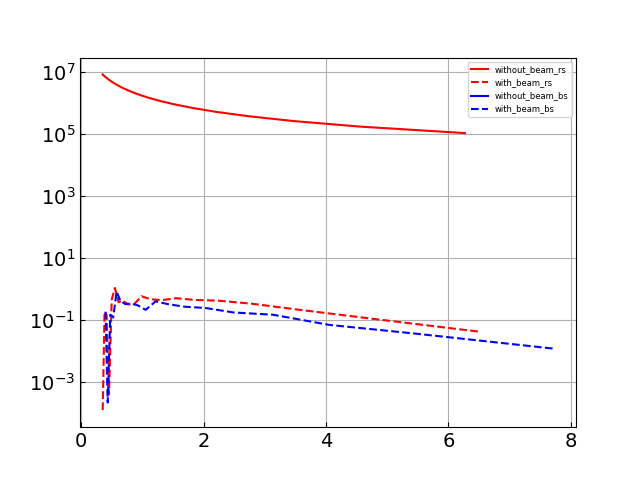

In [60]:
fig, axs = plt.subplots()

def ssdisk(r, Ic, rc, gamma, beta = None):
    beta_p = gamma if beta is None else beta # - beta = - gamma - q
    
    I_cube = Ic * (r/rc)**(- beta_p) * np.exp(-(r/rc)**(2. - gamma))
    
    I_cube /= np.abs((0.06)*(0.06)) # per pixel to per arcsec^2
    I_cube *= np.pi/(4.*np.log(2.)) * 0.6 * 0.6 # per arcsec^2 --> per beam
    
    return I_cube

Tb_pv_without_beam["Tb_on_point_rs"] = ssdisk(r=Tb_pv_without_beam["r_rs"],
                                              Ic=1.,rc=600., beta=1.5, gamma=1.)
Tb_pv_without_beam["Tb_on_point_bs"] = ssdisk(r=Tb_pv_without_beam["r_bs"],
                                              Ic=1.,rc=600., beta=1.5, gamma=1.)

axs.plot(Tb_pv_without_beam["r_rs"], Tb_pv_without_beam["Tb_on_point_rs"], 
         label='without_beam_rs', c='r', ls = '-')
axs.plot(Tb_pv_with_beam["r_rs"], Tb_pv_with_beam["Tb_on_point_rs"], label='with_beam_rs', c='r', ls = '--')

axs.plot(-Tb_pv_without_beam["r_bs"], Tb_pv_without_beam["Tb_on_point_bs"], label='without_beam_bs', c='b', ls = '-')
axs.plot(-Tb_pv_with_beam["r_bs"], Tb_pv_with_beam["Tb_on_point_bs"], label='with_beam_bs', c='b', ls = '--')
axs.legend(prop={'size': 6})
axs.grid()
axs.set_yscale('log')
plt.show()

18
18


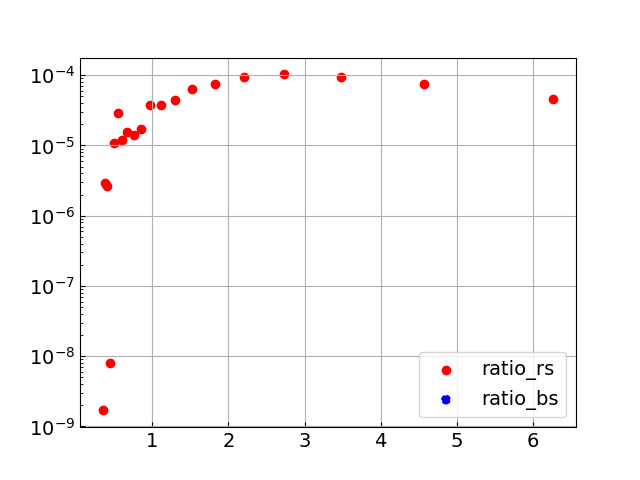

In [55]:
red_factor = np.divide(Tb_pv_without_beam["Tb_on_point_rs"],Tb_pv_with_beam["Tb_on_point_rs"])


print(len(Tb_pv_without_beam["Tb_on_point_bs"]))
print(len(Tb_pv_with_beam["Tb_on_point_bs"][:18]))
blue_factor = np.divide(Tb_pv_without_beam["Tb_on_point_bs"],Tb_pv_with_beam["Tb_on_point_bs"][:18])

fig, axs = plt.subplots()

axs.scatter(Tb_pv_without_beam["r_rs"], 1/red_factor, label='ratio_rs', c='r', ls = '-')

axs.scatter(-Tb_pv_with_beam["r_bs"][:18], 1/blue_factor, label='ratio_bs', c='b', ls = '--')

axs.legend()
axs.set_yscale('log')
axs.grid()
plt.show()